In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
data = pd.read_csv("econ_data.csv", encoding = "ISO-8859-1")
data.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


# Which countries are the most free, and which are the least free?

We begin our analysis by answering the following question: Which countries are the most/least free. To answer this, we simply take the top/bottom countries sorted by the 'World Rank' column.

In [4]:
# Get the five countries with the highest freedom index scores.
data.nsmallest(5, 'World Rank')[['Country Name', '2019 Score']]

,Country Name,2019 Score
72,Hong Kong,90.2
149,Singapore,89.4
122,New Zealand,84.4
160,Switzerland,81.9
6,Australia,80.9


In [5]:
# Get the five countries with the lowest freedom index scores.
data.nlargest(5, 'World Rank')[['Country Name', '2019 Score']]

,Country Name,2019 Score
88,"Korea, North",5.9
181,Venezuela,25.9
42,Cuba,27.8
53,Eritrea,38.9
38,"Congo, Republic of",39.7


From the above, we see that Hong Kong has the highest freedom index score, and North Korea has the lowest. This provides a good starting point for further analysis. Generally, we ask: What do the countries with the highest/lowest freedom index have in common? To start, we look at the correlation between the economic indicators present in the data. This analysis is done below:

# Correlation analysis - what makes free countries free?

In [6]:
# First figure out which columns we want to include.
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

From the above columns, it seems like a good starting point for looking at the correlation is to look at the correlation between everything except the following columns:

- CountryID
- Country Name
- WEBNAME
- Region
- Region Rank
- World Rank

However, before proceeding, we convert any string data into numerical data (such as GDP information). This needs to be done, otherwise we won't be able to look at that columns correlation with the freedom index score. This is done below:

In [7]:
# Check which columns contain non-numerical data
data.select_dtypes(exclude='number').columns

Index(['Country Name', 'WEBNAME', 'Region', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'Unemployment (%)',
       'FDI Inflow (Millions)'],
      dtype='object')

From the above, we see that non-numerical data of interest are the population, GDP, GDP per capita, unemployment, and FDI inflow. To get a sense of what conversions we need to do, we display the pertinent information below:

In [8]:
# Display non-numerical columns of interest.
data[['Population (Millions)', 'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'FDI Inflow (Millions)']].head(1)

,Population (Millions),"GDP (Billions, PPP)",GDP per Capita (PPP),Unemployment (%),FDI Inflow (Millions)
0,35.5,$69.6,"$1,958",8.8,53.9


In [9]:
# Print the data types for the above columns
data[['Population (Millions)', 'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'FDI Inflow (Millions)']].dtypes

Population (Millions)    object
GDP (Billions, PPP)      object
GDP per Capita (PPP)     object
Unemployment (%)         object
FDI Inflow (Millions)    object
dtype: object

From the above two cells, we see that we need to convert all of the above to numerical data, being sure to first remove the dollar signs in front of the GDP information. This is done below:

In [10]:
# Function to properly format the object info into a number with 2 decimal places.
def convert_to_float(s):
    
    # Split and take the first word, in case of multiple words.
    s = s.split()[0]
    
    # Only take numerical characters and decimal points.
    s = "".join(c for c in s if c.isdigit() or c == '.')
    
    return round(float(s), 2)

# Filter the data accordingly, being sure to remove null data.
filtered_data = data.dropna(subset=['Population (Millions)', 'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'FDI Inflow (Millions)']).copy()
filtered_data['Population (Millions)'] = filtered_data['Population (Millions)'].astype(float)
filtered_data['GDP (Billions, PPP)'] = filtered_data['GDP (Billions, PPP)'].apply(convert_to_float)
filtered_data['GDP per Capita (PPP)'] = filtered_data['GDP per Capita (PPP)'].apply(convert_to_float)
filtered_data['Unemployment (%)'] = filtered_data['Unemployment (%)'].astype(float)
filtered_data['FDI Inflow (Millions)'] = filtered_data['FDI Inflow (Millions)'].apply(convert_to_float)

Now that we have properly filtered data, we obtain the correlation information below:

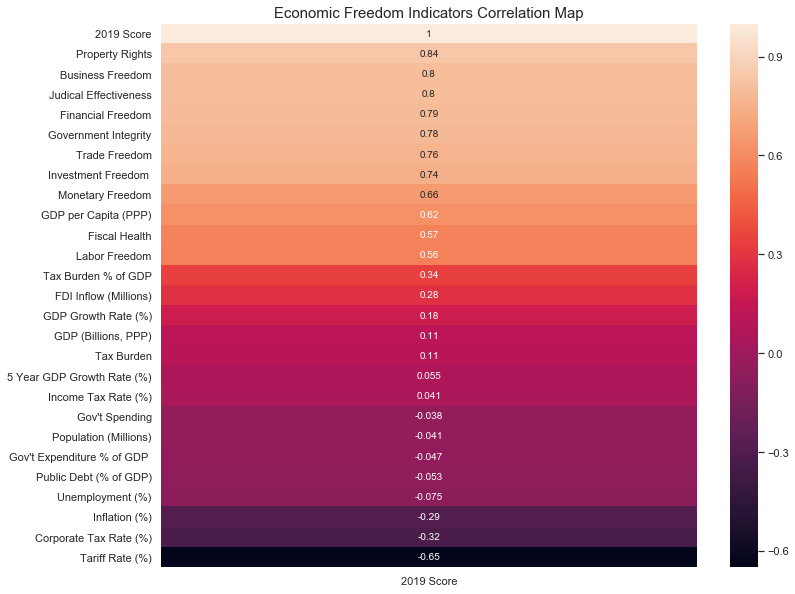

In [11]:
# Get the correlation data for everything excluding the aforementioned columns.
corr_data = filtered_data[filtered_data.columns.difference(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'Region Rank', 'World Rank'])]
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title("Economic Freedom Indicators Correlation Map", fontsize=15)
sns.heatmap(corr['2019 Score'].to_frame().sort_values(by='2019 Score', ascending=False), ax=ax, annot=True)
plt.show()

From the above heatmap, we see that the Freedom Index Score (2019 Score) is most strongly correlated with Property Rights, and has the strongest negative correlation with the Tarrif Rate. More generally, we see that a healthy, functioning government (as measured by property rights, business freedom, judicial effectiveness..) seems to be a strong predictor of a high score on the freedom index. This makes sense, given that the freedom index is likely some linear combination of freedom measures (Monetary Freedom, etc.). In addition, we see that GDP Per Capita is moderately correlated with the 2019 freedom index score, indicating that countries with more freedoms tend to be more wealthy.

Next, we look at specific characteristics of countries with high, moderate, and low freedom index scores.

# Freedom Index Score - What Does It Mean?

Here, we take a closer look at the characteristics of countries that rank high, moderate, and low on the freedom index. In particular, we look at the following:

1. Average GDP Per capita
2. Average 5 Year GDP Growth Rate

We look at the above two metrics to get some sense of the health/growth of economies that fall into the aforementioned brackets. Before proceeding with this analysis, however, we need to determine what we precisely mean by a high/moderate/low freedom index score. To do this, we look at the median and IQR for freedom index score, and use this information to come up with dilineations for high/moderate/low scores:

In [12]:
# Get the quartile information for freedom index scores (2019 score).
quartiles = data['2019 Score'].quantile([0.25, 0.5, 0.75])
min_score = data['2019 Score'].min()
max_score = data['2019 Score'].max()
print(quartiles, "\n")
print("Min score: ", min_score)
print("Max score: ", max_score)

0.25    53.95
0.50    60.75
0.75    67.80
Name: 2019 Score, dtype: float64 

Min score:  5.9
Max score:  90.2


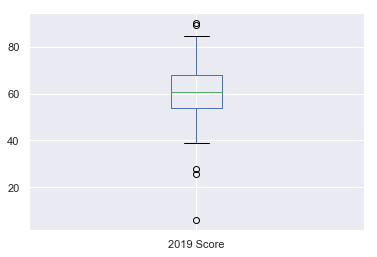

In [13]:
# Box and whisker plot for illustration.
score_boxplot = data.boxplot(column=['2019 Score'])

From the above quartile values, we arbitrarily assign any freedom index score below or at 53.95 as low, any score in (53.95, 67.80] as moderate, and anything above 67.80 as high. Below, we create this new column for our dataset, clean up the gdp data, and then compute the aforementioned statistics:

In [24]:
# Clean up GDP data.
gdp_data = data.dropna(subset=['GDP per Capita (PPP)', '5 Year GDP Growth Rate (%)']).copy()
gdp_data['GDP per Capita (PPP)'] = gdp_data['GDP per Capita (PPP)'].apply(convert_to_float)

# Add new column
gdp_data['Score Category'] = pd.cut(gdp_data['2019 Score'], [5.9, 53.95, 67.8, 90.2], labels = ['low', 'moderate', 'high'], include_lowest=True)

# Compute summary statistics.
table = gdp_data.groupby(['Score Category'])[['GDP per Capita (PPP)', '5 Year GDP Growth Rate (%)']].mean().round(2)
table.reset_index().set_index('Score Category')

,GDP per Capita (PPP),5 Year GDP Growth Rate (%)
Score Category,,
low,7462.32,2.78
moderate,15916.40,3.44
high,44838.00,2.90


From the above, we see that per our expectations, countries with a low freedom index score have the lowest gpd per capita, and countries with a high score have the highest gpd per capita. However, surprisingly, countries with a moderate freedom index score have the highest 5 year gdp growth rate. A visualization of this data is shown below:

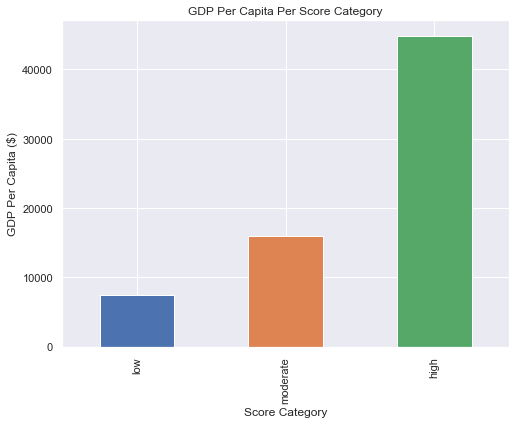

In [31]:
# Plot for GDP Per Capita
gdp_per_capita = table['GDP per Capita (PPP)']
ax1 = gdp_per_capita.plot(kind='bar', figsize=(8,6))
ax1.set_title("GDP Per Capita Per Score Category")
ax1.set_ylabel("GDP Per Capita ($)")
plt.show()

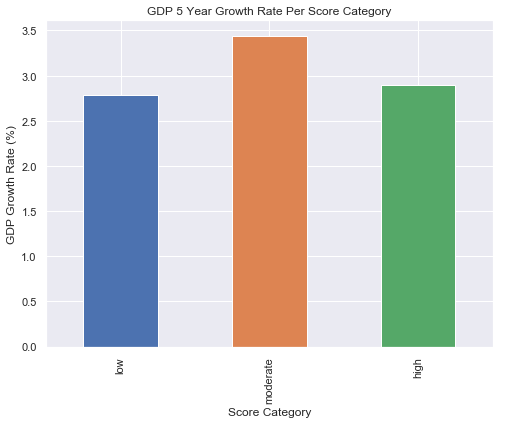

In [32]:
# Plot for GDP growth.
gdp_growth_rate = table['5 Year GDP Growth Rate (%)']
ax2 = gdp_growth_rate.plot(kind='bar', figsize=(8,6))
ax2.set_title("GDP 5 Year Growth Rate Per Score Category")
ax2.set_ylabel("GDP Growth Rate (%)")
plt.show()